In [1]:
# importing for ipywidgets
from __future__ import print_function
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets
import re

In [2]:
#import to filter warnings
import warnings
warnings.filterwarnings('ignore')
#!pip install numpy
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as ticker
from matplotlib.pyplot import xticks
%matplotlib inline
sns.set(style="whitegrid")
sns.set(rc={'figure.figsize':(16,10)})
pd.set_option('display.max_rows', 400)
pd.set_option('display.max_columns', 100)
pd.set_option('display.max_colwidth', -1)

In [3]:
#### convert the next cell to code to install textblob

!pip install -U textblob

In [4]:

import calendar
import datetime as dt
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
nltk.download('punkt')
nltk.download('movie_reviews')
from nltk.tokenize import word_tokenize

from nltk.tokenize import RegexpTokenizer
from collections import Counter
from textblob import TextBlob
from textblob.sentiments import NaiveBayesAnalyzer

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Admin\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Admin\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package movie_reviews to
[nltk_data]     C:\Users\Admin\AppData\Roaming\nltk_data...
[nltk_data]   Package movie_reviews is already up-to-date!


In [5]:
nltk.download('twitter_samples')
nltk.download('wordnet')
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package twitter_samples to
[nltk_data]     C:\Users\Admin\AppData\Roaming\nltk_data...
[nltk_data]   Package twitter_samples is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Admin\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\Admin\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


True

# Put your input in the next block and name it inputdf

In [32]:

inputdf=pd.read_excel("try.xlsx",encoding="utf-8")


In [33]:
@interact
def readingcomments(video=inputdf.video_title.unique()):
    words = inputdf.loc[inputdf['video_title'] == video].comments[0].lower().split(sep="b'")
    textblock=" ".join(words)
    wordsdf= pd.DataFrame(columns=["Comments_on_video ---   " +video],data=words)
    return wordsdf

interactive(children=(Dropdown(description='video', options=('Maithili Thakur sings her version of "Perfect"',…

In [35]:
neg=[ 'ain',
 'aren',
 "aren't",
 'couldn',
 "couldn't",
 'didn',
 "didn't",
 'doesn',
 "doesn't",
 'hadn',
 "hadn't",
 'hasn',
 "hasn't",
 'haven',
 "haven't",
 'isn',
 "isn't",
 'ma',
 'mightn',
 "mightn't",
 'mustn',
 "mustn't",
 'needn',
 "needn't",
 'shan',
 "shan't",
 'shouldn',
 "shouldn't",
 'wasn',
 "wasn't",
 'weren',
 "weren't",
 'won',
 "won't",
 'wouldn',
 "wouldn't","not","don't","dont","do not","won't"]

In [36]:
eng_stopwords = stopwords.words('english')
eng_stopwords = [x for x in eng_stopwords if x not in neg]

In [37]:
global Sentiment
Heads=["Post_Id",'Video_Title', 'Sentiment on Video','Subjectivity on Video']
Sentiment=pd.DataFrame(columns=Heads)
Sentiment

,Post_Id,Video_Title,Sentiment on Video,Subjectivity on Video


In [20]:
new="This is how Corona smiles at people!,Not a bad idea if we cancel our order few times to gift these hard working delivery boys.,The reason behind his smile.😂🤣,He is actually cool,,, happy in watever the life is giving,,, good,,, this is a great skill,,,,, I need to develop it,,This smile is natural for every Sonu!Even in the worst situation they smile the same!!😉😬🤫,Now Zomato company will use this man sonu as sona... like gold.. to improve its business,How come his lips never touch together?,He seems to be high on marijuana :O,Ohbhaaiii Maro Mujhe Maro,The boy you are looking at is the delivery boy, this boy is my classmate And it stays near my house😂😂😂😂,Smiling is very good but not everywhere, suppose if there is funeral going on and you are still smiling then can you imagine what will happen😂,I want this level of satisfaction from my life....,When they come to deliver, we should ask them for tea/water, treat them respectfully.... often people do not behave good with them.,For those who don't know, 350 rupees is around 5 dollars. That's 5 dollars for 12 hours of work.,When delivery boy arrives, cancel the order infront of him and enjoy the free food together,350 rupees for 12 hours( with incentives included) still the man laugh wow ??? ,I wish everyone should have such an amazing temperament. Specially in this era of negativity and doubts.🙏🙏,I wish everyone could smile like you Mr.Sonu.. Ur making this world a better place by just smiling and accepting your life.. loads of love 😘😘 God bless,He is so innocent... Why is he getting trolled! He works hard..,His smile and positive attitude is contagious. We should all smile more often 🙂,Such a innocent guy with the cute smile on his face... Appreciate you brother,Hi Danish your work is raly appriciable becoz you have found amazing smile as Sonu...,He is living actually. He is happy whatever he have. 🙂,🔥😎😂,🤣,😂😍😍😍😂, 😊☺️😁 🤪 😂,Earning 350 and eating 1000 rs butter chicken from cancel delivery very nice work,His smile is highly contagious,Serial killer smile.. 🙈🙈🙈🙈🙈,Helmet shot is the best,Let’s cancel our order at least once in a month for Sunos of our areas! ,He is so happy with his job.. keep smile,We have found richest than ambani,Hassan Arain young ala ni lg rya? 🤣,Iske pagar pe hasne ki nahi rone k baat hai, aur kehte hai garibi Kam hui,Great thing is he is happy with whatever he has which is very rare,Kv arts teacher Geography shiv sir,The laughter of the people rather than the video is laughing at me laughing🤣🤣" 


In [38]:
@interact
def readingcomments(video=inputdf.video_title.unique()):
    comments_words = inputdf.loc[inputdf['video_title'] == video].comments.str.lower().str.cat(sep=' ').split()
    comments_as_text_block=" ".join(comments_words)
    tokenizer = RegexpTokenizer(r'\w+')
    result = tokenizer.tokenize(comments_as_text_block)
    text = " ".join(result)
    tokens_stopwords = word_tokenize(text)
    no_stopwords_tokens = [word for word in tokens_stopwords if not word in stopwords.words()]
    #print(no_stopwords_tokens)
    #print(text_tokens)
    textblock_without_stopwords=" ".join(no_stopwords_tokens)
    textblock_with_stopwords=" ".join(tokens_stopwords)
    top_N = 1000
    word_all = pd.DataFrame(Counter(no_stopwords_tokens).most_common(top_N),
                    columns=['word', 'Freq']).set_index('word')
    word_count=word_all[word_all.Freq>1]
    #mask = np.array(Image.open('E:/Insights/logos/cloud.jpg'))
    #image_colors = ImageColorGenerator(mask)
    #wordcloud = WordCloud(max_font_size=50, max_words=100, background_color="white",mask=mask,color_func = image_colors,contour_width=7, contour_color='blue').generate(textblock_without_stopwords)
    #fig=plt.figure(figsize=(12,10))
    #plt.imshow(wordcloud, interpolation="bilinear")
    #plt.axis("off")
    #plt.tight_layout(pad=0)
    wordcloud = WordCloud(max_font_size=50, max_words=30, background_color="white").generate(textblock_without_stopwords)
    plt.figure()
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis("off")
    plt.show()
    sent          = TextBlob(textblock_without_stopwords)
    polarity      = sent.sentiment.polarity
    subjectivity  = sent.sentiment.subjectivity
    sent          = TextBlob(text, analyzer = NaiveBayesAnalyzer())
    classification= sent.sentiment.classification
    positive      = sent.sentiment.p_pos
    negative      = sent.sentiment.p_neg
    if (polarity <0.2 and polarity >= 0):
        Senti="Neutral"
    elif (polarity > 0.2):
        Senti="Positive"
    else:
        Senti="Negative"
    if (subjectivity <0.2 and subjectivity >= 0):
        Senti="Neutral"
    elif (polarity > 0.2):
        Senti="Positive"
    else:
        Senti="Negative"
    if (subjectivity <0.2):
        Subj="Highly Objective"
    elif (subjectivity >0.2 and subjectivity >= 0.4):
        Subj="Slightly Objective"
    elif (subjectivity >0.4 and subjectivity >= 0.6):
        Subj="Subjective"
    else:
        Subj="Highly Subjective"
    #global Sentiment
    #Heads=[" Post_id", 'Video_Title', 'Sentiment on Video','Subjectivity on Video']
    #Sentiment=pd.DataFrame(columns=Heads)
    #rows =[[video, Senti, Subj]]
    rows =[[len(Sentiment),video, Senti, Subj]]
    #new_row = pd.Series({'Video_Title': video, 'Sentiment on Video': Senti, 'Subjectivity on Video': Subj})
    for each_video_result in rows:
             Sentiment.loc[len(Sentiment)] = each_video_result
    Sentiment.set_index("Post_Id")
    return plt.show(), print(Sentiment), polarity

interactive(children=(Dropdown(description='video', options=('Maithili Thakur sings her version of "Perfect"',…

In [39]:
Sentiment

,Post_Id,Video_Title,Sentiment on Video,Subjectivity on Video
0,0,"Maithili Thakur sings her version of ""Perfect""",Positive,Slightly Objective


In [23]:
comment='😉😬🤫,Now Zomato company will use this man sonu as 😂😂😂😂'

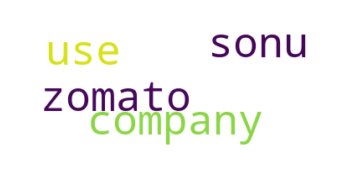

In [30]:
    comments_words = comment.lower().split()
    comments_as_text_block=" ".join(comments_words)
    tokenizer = RegexpTokenizer(r'\w+')
    result = tokenizer.tokenize(comments_as_text_block)
    text = " ".join(result)
    tokens_stopwords = word_tokenize(text)
    no_stopwords_tokens = [word for word in tokens_stopwords if not word in stopwords.words()]
    #print(no_stopwords_tokens)
    #print(text_tokens)
    textblock_without_stopwords=" ".join(no_stopwords_tokens)
    textblock_with_stopwords=" ".join(tokens_stopwords)
    top_N = 1000
    word_all = pd.DataFrame(Counter(tokens_stopwords).most_common(top_N),
                    columns=['word', 'Freq']).set_index('word')
    word_count=word_all[word_all.Freq>1]
    #mask = np.array(Image.open('E:/Insights/logos/cloud.jpg'))
    #image_colors = ImageColorGenerator(mask)
    #wordcloud = WordCloud(max_font_size=50, max_words=100, background_color="white",mask=mask,color_func = image_colors,contour_width=7, contour_color='blue').generate(textblock_without_stopwords)
    #fig=plt.figure(figsize=(12,10))
    #plt.imshow(wordcloud, interpolation="bilinear")
    #plt.axis("off")
    #plt.tight_layout(pad=0)
    wordcloud = WordCloud(max_font_size=50, max_words=30, background_color="white").generate(textblock_without_stopwords)
    plt.figure()
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis("off")
    plt.show()

In [31]:
word_all

,Freq
word,
now,1
zomato,1
company,1
will,1
use,1
this,1
man,1
sonu,1
as,1
